<a href="https://colab.research.google.com/github/vgeneva/EKG/blob/main/EKG_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECG/EKG information
wfdb lybrary in python.

In [1]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.1 MB/s eta 0:00:00


In [2]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MIT - BIH dataset

The MIT-BIH Arrhythmia Database is one of the most widely used datasets for research in electrocardiography (ECG). It contains 48 half-hour recordings of two-channel ECG signals from 47 different patients, primarily from the Beth Israel Hospital in Boston, Massachusetts, recorded between 1975 and 1979. The dataset includes a variety of heart arrhythmias and normal heartbeats, making it essential for developing and testing algorithms for arrhythmia detection, classification, and ECG signal processing.

Each record typically includes two ECG leads (e.g., MLII and V5) and is annotated with beat labels, identifying different types of heartbeats. It has been a benchmark dataset for evaluating automatic ECG analysis systems.

Thank you https://github.com/mikkelhartmann/ecg-analysis-mit-bih/blob/master/MIT-BIH-database.ipynb#:~:text=The%20MIT%2DBIH%20dataset,download%20and%20read%20the%20data.

In [3]:
if os.path.isdir("mitdb"):
  print("The MIT-BIH dataset has already been downloaded.")
else:
  wfdb.dl_database('mitdb', 'mitdb')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

# Understanding the files
record is part of the wfdb library functionality. I've downloaded the files, now I am looking at the first record.

In [4]:
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

In [5]:
record

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [ 0.875,  0.555],
        [ 0.925,  0.21 ],
        [ 0.795, -0.125]]),
 {'fs': 360,
  'sig_len': 3000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V5'],
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

In [6]:
record[0]

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [ 0.875,  0.555],
       [ 0.925,  0.21 ],
       [ 0.795, -0.125]])

In [7]:
len(record)

2

Here you can see that his patient has MLII and V5 leads only. There are usually 12 leads on the body when recording the ECG.

The 12-lead ECG is the standard for a comprehensive view of the heart's electrical activity. It combines three limb leads (I, II, III), three augmented limb leads (aVR, aVL, aVF), and six precordial leads (V1-V6), providing a 360-degree view of the heart.

Each ECG lead provides a view of the heart’s electrical activity from a different angle or perspective. The electrical impulses of the heart are recorded by electrodes placed on the body, and the configuration of these electrodes defines the lead. Each lead captures a unique projection of the heart's electrical signal, giving cardiologists insight into different aspects of heart function.

Lead II (MLII): Provides the clearest and most stable signal for continuous monitoring, often used in telemetry and during surgeries.

Precordial Leads (V1-V6): Essential for diagnosing acute coronary syndromes, including anterior and lateral wall infarctions.



record[0] has these leads:

Lead II (MLII) records the difference in electrical potential between the right arm (negative electrode) and the left leg (positive electrode). It is commonly used because it provides a clear view of the heart's electrical axis, particularly the P waves and QRS complex.


Lead V5 is part of the precordial (chest) leads and is placed on the left side of the chest. It provides a horizontal view of the heart, focusing on the lateral aspect of the left ventricle.

In [8]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

# Plotting

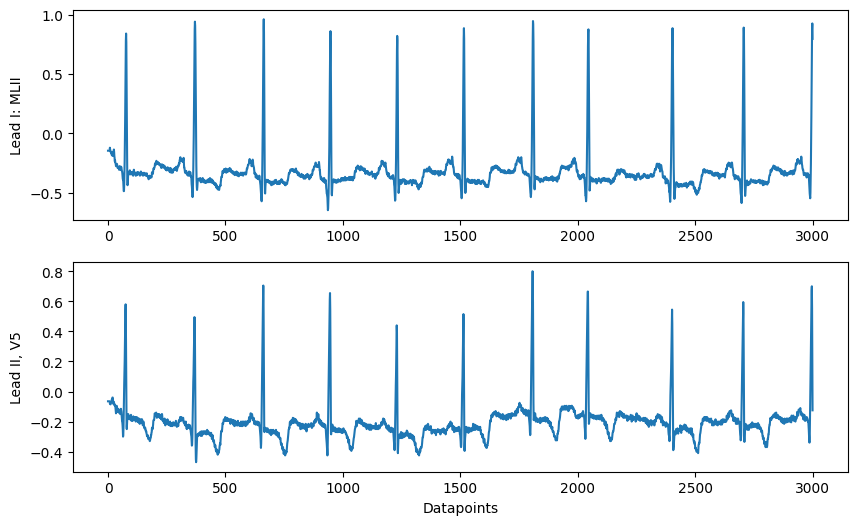

In [9]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
I = record[0][:,0]
II = record[0][:,1]
ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel("Lead I: MLII")
ax[1].set_xlabel("Datapoints")
ax[1].set_ylabel('Lead II, V5')
plt.show()

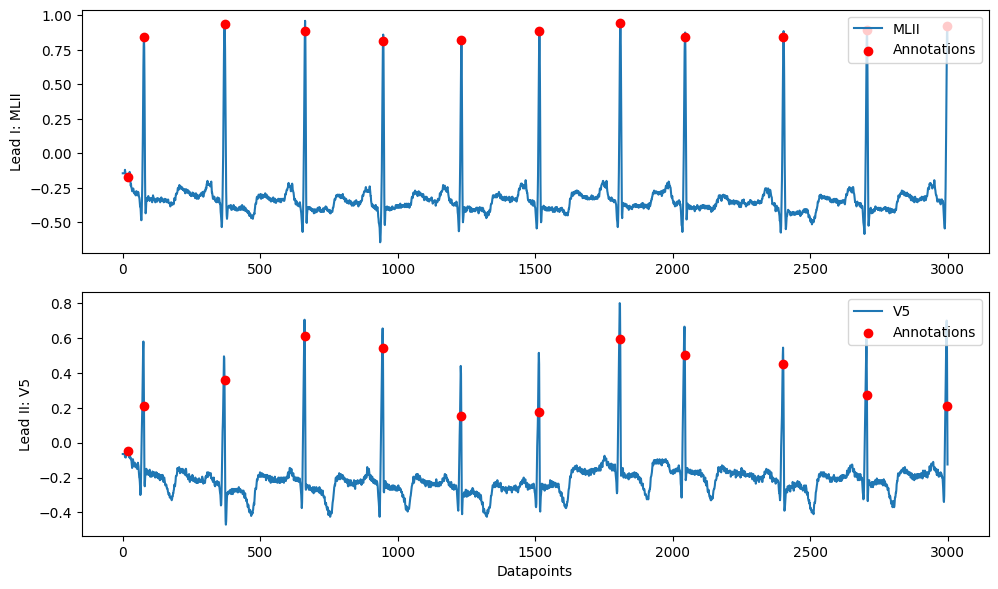

In [10]:
# Get the signal data
I = record[0][:, 0]  # Lead I (MLII)
II = record[0][:, 1]  # Lead II (V5)

# Get the annotation locations
ann_samples = annotation.sample  # Sample indices of annotations

# Create subplots
fig, ax = plt.subplots(nrows=2, figsize=(10, 6))

# Plot the signals
ax[0].plot(I, label='MLII')
ax[1].plot(II, label='V5')

# Plot annotations on Lead I (MLII)
ax[0].scatter(ann_samples, I[ann_samples], color='red', label='Annotations', zorder=3)

# Plot annotations on Lead II (V5)
ax[1].scatter(ann_samples, II[ann_samples], color='red', label='Annotations', zorder=3)

# Label the axes
ax[0].set_ylabel("Lead I: MLII")
ax[1].set_xlabel("Datapoints")
ax[1].set_ylabel("Lead II: V5")

# Add legends to both plots
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# Load the annotation data
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Print sample indices of the annotations
print("Annotation samples (indices):", annotation.sample)

# Print the symbols associated with the annotations (e.g., normal beat, premature beat, etc.)
print("Annotation symbols:", annotation.symbol)

# Print auxiliary notes, if any
print("Auxiliary notes:", annotation.aux_note)



Annotation samples (indices): [  18   77  370  662  946 1231 1515 1809 2044 2402 2706 2998]
Annotation symbols: ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N']
Auxiliary notes: ['(N\x00', '', '', '', '', '', '', '', '', '', '', '']


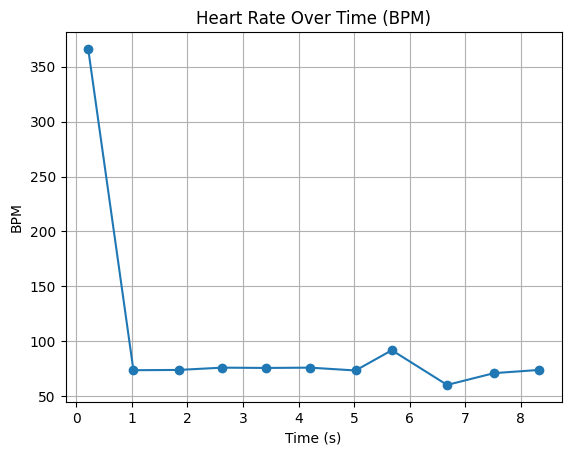

In [12]:


# Get the sample indices where heartbeats are annotated
ann_samples = annotation.sample

# Get the sampling frequency
fs = record[1]['fs']  # Typically 360 Hz for MIT-BIH database

# Calculate RR intervals (time between consecutive beats in seconds)
rr_intervals = np.diff(ann_samples) / fs  # Time between beats in seconds

# Calculate BPM (beats per minute)
bpm = 60 / rr_intervals

# Plot the BPM over time (we plot from the second beat onwards)
time = ann_samples[1:] / fs  # Convert sample indices to time in seconds
plt.plot(time, bpm, marker='o', linestyle='-')
plt.title('Heart Rate Over Time (BPM)')
plt.xlabel('Time (s)')
plt.ylabel('BPM')
plt.grid()
plt.show()


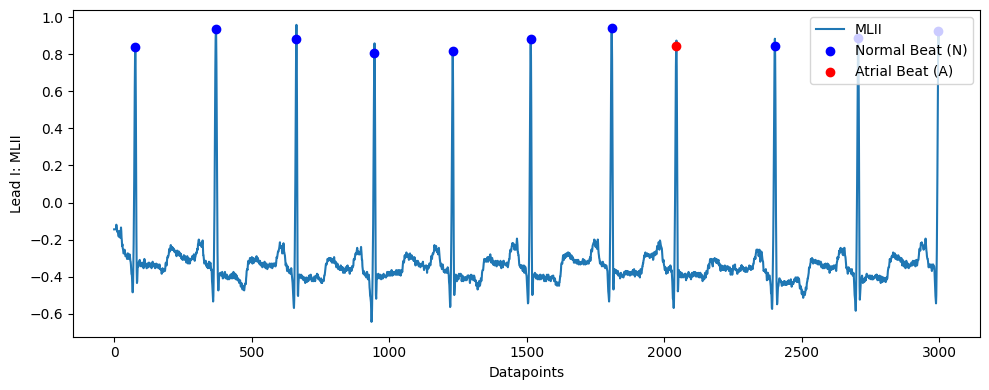

In [13]:

# Load the signal and annotation
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Get the signal data (Lead I: MLII)
I = record[0][:, 0]

# Get the annotation samples and symbols
ann_samples = annotation.sample
ann_symbols = annotation.symbol

# Get the sampling frequency
fs = record[1]['fs']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the signal (MLII)
ax.plot(I, label='MLII')

# Plot normal beats ('N') in blue
normal_indices = np.where(np.array(ann_symbols) == 'N')[0]
ax.scatter(ann_samples[normal_indices], I[ann_samples[normal_indices]], color='blue', label='Normal Beat (N)', zorder=3)

# Plot the 'A' beats (atrial premature contraction) in red
a_indices = np.where(np.array(ann_symbols) == 'A')[0]
ax.scatter(ann_samples[a_indices], I[ann_samples[a_indices]], color='red', label='Atrial Beat (A)', zorder=3)

# Label axes
ax.set_ylabel("Lead I: MLII")
ax.set_xlabel("Datapoints")

# Add legend
ax.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [14]:

# Load the signal and annotation (change '100' to the appropriate record ID for your dataset)
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Get the annotation symbols and samples
ann_samples = annotation.sample
ann_symbols = annotation.symbol

# Find arrhythmic beats (e.g., 'A')
arrhythmic_beats = np.where(np.array(ann_symbols) == 'A')[0]

# Check if any arrhythmic beats exist
if len(arrhythmic_beats) > 0:
    print(f"Found {len(arrhythmic_beats)} arrhythmic beats (A).")

    # Loop through each arrhythmic beat
    for idx in arrhythmic_beats:
        # Find the previous beat index (if it exists)
        if idx > 0:
            previous_beat_index = idx - 1
            previous_beat_symbol = ann_symbols[previous_beat_index]
            previous_beat_sample = ann_samples[previous_beat_index]

            arrhythmic_beat_sample = ann_samples[idx]
            arrhythmic_beat_symbol = ann_symbols[idx]

            # Print information about the arrhythmic beat and the previous beat
            print(f"\nArrhythmic Beat (A) at sample {arrhythmic_beat_sample}")
            print(f"Previous Beat: {previous_beat_symbol} at sample {previous_beat_sample}")
        else:
            print("This is the first beat, no previous beat exists.")
else:
    print("No arrhythmic beats ('A') found in the data.")


Found 1 arrhythmic beats (A).

Arrhythmic Beat (A) at sample 2044
Previous Beat: N at sample 1809


In [15]:
# Load the signal and annotation (change '100' to your appropriate record ID)
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Get the annotation symbols and corresponding sample indices
ann_samples = annotation.sample
ann_symbols = annotation.symbol

# Identify the normal ('N') and arrhythmic ('A') beat indices
normal_indices = np.where(np.array(ann_symbols) == 'N')[0]
arrhythmic_indices = np.where(np.array(ann_symbols) == 'A')[0]

# Ensure there are both normal and arrhythmic beats
if len(normal_indices) > 1 and len(arrhythmic_indices) > 0:
    # Select an R-R interval for a normal beat
    # Choose any two consecutive normal beats
    normal_rr_start = normal_indices[0]  # First normal beat
    normal_rr_end = normal_indices[1]    # Second normal beat
    normal_rr_interval = ann_samples[normal_rr_end] - ann_samples[normal_rr_start]

    print(f"Normal R-R interval between samples {ann_samples[normal_rr_start]} and {ann_samples[normal_rr_end]}: {normal_rr_interval} samples")

    # Select an R-R interval for an arrhythmic beat
    # Choose the arrhythmic beat and the next beat, regardless of type
    arrhythmic_rr_start = arrhythmic_indices[0]  # First arrhythmic beat (e.g., 'A')
    arrhythmic_rr_end = arrhythmic_rr_start + 1  # Next beat (could be 'N' or something else)

    # Ensure the arrhythmic beat isn't the last beat in the dataset
    if arrhythmic_rr_end < len(ann_samples):
        arrhythmic_rr_interval = ann_samples[arrhythmic_rr_end] - ann_samples[arrhythmic_rr_start]

        print(f"Arrhythmic R-R interval between samples {ann_samples[arrhythmic_rr_start]} and {ann_samples[arrhythmic_rr_end]}: {arrhythmic_rr_interval} samples")
    else:
        print("No subsequent beat found for the arrhythmic beat.")
else:
    print("Not enough normal or arrhythmic beats to calculate R-R intervals.")


Normal R-R interval between samples 77 and 370: 293 samples
Arrhythmic R-R interval between samples 2044 and 2402: 358 samples


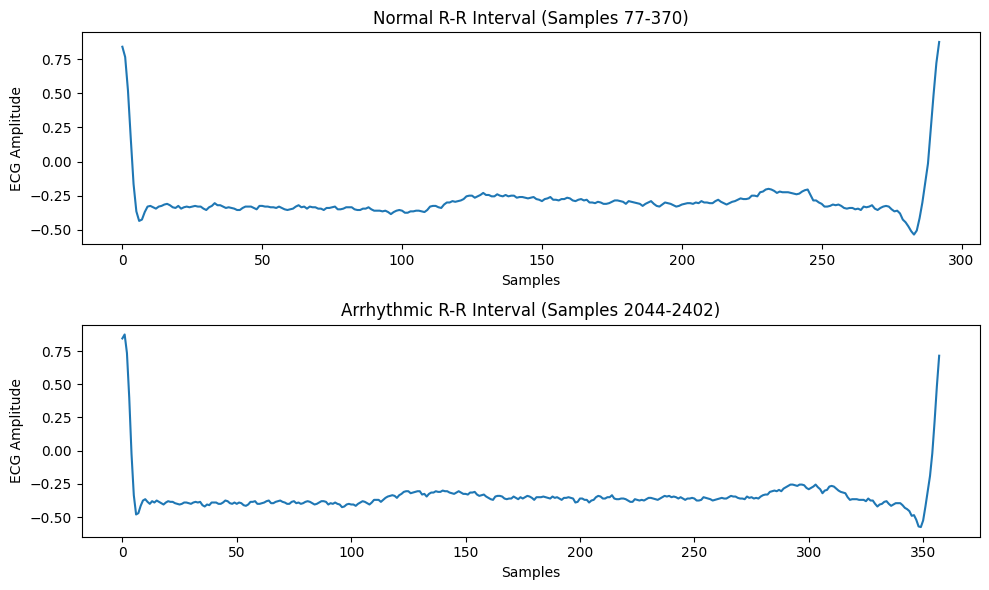

In [16]:
# prompt: i want to plot the Normal R-R interval between 77 and 370 and the Arryhtmic R-R interavl between 2044 and 2402



# Load the signal and annotation (change '100' to your appropriate record ID)
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Get the signal data (Lead I: MLII)
I = record[0][:, 0]

# Get the annotation samples and symbols
ann_samples = annotation.sample
ann_symbols = annotation.symbol

# Define the start and end samples for the R-R intervals
normal_rr_start_sample = 77
normal_rr_end_sample = 370
arrhythmic_rr_start_sample = 2044
arrhythmic_rr_end_sample = 2402

# Extract the corresponding ECG segments
normal_rr_segment = I[normal_rr_start_sample:normal_rr_end_sample]
arrhythmic_rr_segment = I[arrhythmic_rr_start_sample:arrhythmic_rr_end_sample]

# Create a figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plot the normal R-R interval
ax[0].plot(normal_rr_segment)
ax[0].set_title("Normal R-R Interval (Samples 77-370)")
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("ECG Amplitude")

# Plot the arrhythmic R-R interval
ax[1].plot(arrhythmic_rr_segment)
ax[1].set_title("Arrhythmic R-R Interval (Samples 2044-2402)")
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("ECG Amplitude")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512548 sha256=511af6800dd41bcf0433ac604c23142ac7672cf9eecdf301c26460dcf6271c82
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [18]:

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Load MIT-BIH record data (replace 'mitdb/100' with your record)
record = wfdb.rdsamp('mitdb/100', sampto=3000)
ecg_signal = record[0][:, 0]  # MLII Lead

# Example: Compare two different beats
beat_1 = ecg_signal[100:150]  # A segment of the ECG signal
beat_2 = ecg_signal[200:250]  # Another segment of the ECG signal

beat_1 = beat_1.reshape(-1, 1)
beat_2 = beat_2.reshape(-1, 1)

print(beat_1.shape)
# Compute DTW distance between the two beats
distance, path = fastdtw(beat_1, beat_2, dist=euclidean)

print(f"DTW distance: {distance}")


(50, 1)
DTW distance: 3.36


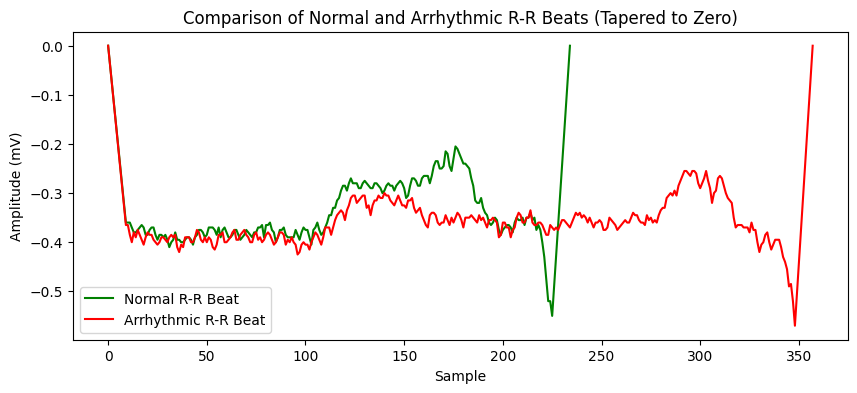

In [21]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load the signal and annotations from the MIT-BIH Arrhythmia Database
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Extract the ECG signal (e.g., Lead II, MLII)
ecg_signal = record[0][:, 0]  # Lead MLII

# Extract R-peak annotations and symbols
rpeaks = annotation.sample
symbols = annotation.symbol

# Find indices of normal ('N') and arrhythmic ('A') beats
normal_indices = np.where(np.array(symbols) == 'N')[0]
arrhythmic_indices = np.where(np.array(symbols) == 'A')[0]

# Choose the normal beat right before an arrhythmic beat
if len(arrhythmic_indices) > 0:
    arrhythmic_index = arrhythmic_indices[0]
    normal_before_arrythmic_index = normal_indices[np.where(normal_indices < arrhythmic_index)[0][-1]]

    # Get the R-R intervals for both beats
    normal_rr_start = rpeaks[normal_before_arrythmic_index]
    normal_rr_end = rpeaks[normal_before_arrythmic_index + 1]

    arrhythmic_rr_start = rpeaks[arrhythmic_index]
    arrhythmic_rr_end = rpeaks[arrhythmic_index + 1]

    # Extract the normal and arrhythmic R-R beat segments
    normal_rr = ecg_signal[normal_rr_start:normal_rr_end]
    arrhythmic_rr = ecg_signal[arrhythmic_rr_start:arrhythmic_rr_end]

    # Function to taper the start and end to zero naturally
    def taper_to_zero(signal, taper_len=10):
        # Linearly taper to zero at the start and end
        signal[0:taper_len] = np.linspace(0, signal[taper_len], taper_len)  # Start taper
        signal[-taper_len:] = np.linspace(signal[-taper_len], 0, taper_len)  # End taper
        return signal

    # Taper both beats so they start and end at zero
    normal_rr_tapered = taper_to_zero(normal_rr.copy(), taper_len=10)
    arrhythmic_rr_tapered = taper_to_zero(arrhythmic_rr.copy(), taper_len=10)

    # Plot the results for comparison
    plt.figure(figsize=(10, 4))
    plt.plot(normal_rr_tapered, label="Normal R-R Beat", color='g')
    plt.plot(arrhythmic_rr_tapered, label="Arrhythmic R-R Beat", color='r')
    plt.legend()
    plt.title("Comparison of Normal and Arrhythmic R-R Beats (Tapered to Zero)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude (mV)")
    plt.show()

else:
    print("No arrhythmic beats found in this sample.")


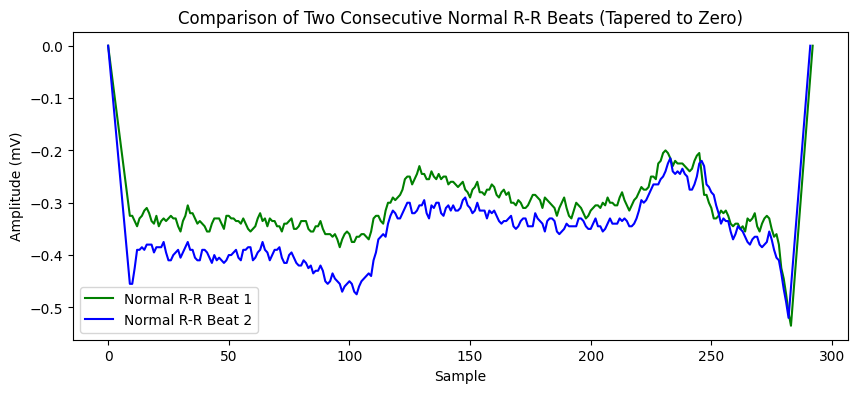

In [22]:


# Load the signal and annotations from the MIT-BIH Arrhythmia Database
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Extract the ECG signal (e.g., Lead II, MLII)
ecg_signal = record[0][:, 0]  # Lead MLII

# Extract R-peak annotations and symbols
rpeaks = annotation.sample
symbols = annotation.symbol

# Find indices of normal ('N') beats
normal_indices = np.where(np.array(symbols) == 'N')[0]

# Choose two consecutive normal beats
if len(normal_indices) > 1:
    normal_index_1 = normal_indices[0]
    normal_index_2 = normal_indices[1]

    # Get the R-R intervals for both normal beats
    normal_rr1_start = rpeaks[normal_index_1]
    normal_rr1_end = rpeaks[normal_index_1 + 1]

    normal_rr2_start = rpeaks[normal_index_2]
    normal_rr2_end = rpeaks[normal_index_2 + 1]

    # Extract the two normal R-R beat segments
    normal_rr1 = ecg_signal[normal_rr1_start:normal_rr1_end]
    normal_rr2 = ecg_signal[normal_rr2_start:normal_rr2_end]

    # Function to taper the start and end to zero naturally
    def taper_to_zero(signal, taper_len=10):
        # Linearly taper to zero at the start and end
        signal[0:taper_len] = np.linspace(0, signal[taper_len], taper_len)  # Start taper
        signal[-taper_len:] = np.linspace(signal[-taper_len], 0, taper_len)  # End taper
        return signal

    # Taper both beats so they start and end at zero
    normal_rr1_tapered = taper_to_zero(normal_rr1.copy(), taper_len=10)
    normal_rr2_tapered = taper_to_zero(normal_rr2.copy(), taper_len=10)

    # Plot the results for comparison
    plt.figure(figsize=(10, 4))
    plt.plot(normal_rr1_tapered, label="Normal R-R Beat 1", color='g')
    plt.plot(normal_rr2_tapered, label="Normal R-R Beat 2", color='b')
    plt.legend()
    plt.title("Comparison of Two Consecutive Normal R-R Beats (Tapered to Zero)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude (mV)")
    plt.show()

else:
    print("Not enough normal beats found in this sample.")


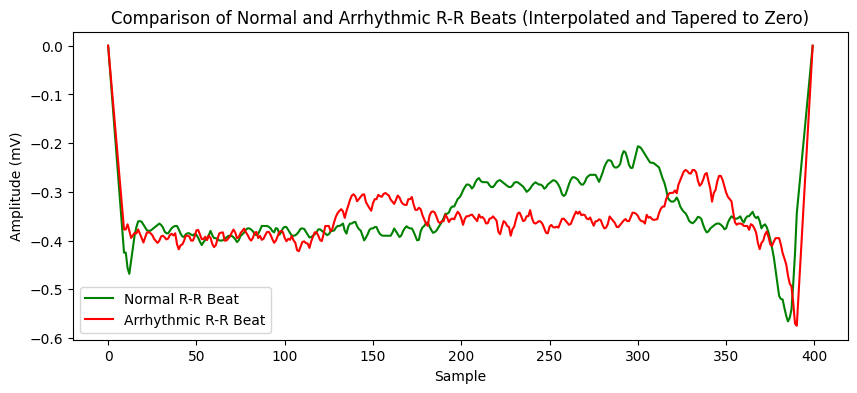

In [27]:

from scipy.interpolate import interp1d

# Load the signal and annotations from the MIT-BIH Arrhythmia Database
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Extract the ECG signal (e.g., Lead II, MLII)
ecg_signal = record[0][:, 0]  # Lead MLII

# Extract R-peak annotations and symbols
rpeaks = annotation.sample
symbols = annotation.symbol

# Find indices of normal ('N') and arrhythmic ('A') beats
normal_indices = np.where(np.array(symbols) == 'N')[0]
arrhythmic_indices = np.where(np.array(symbols) == 'A')[0]

# Choose the normal beat right before an arrhythmic beat
if len(arrhythmic_indices) > 0:
    arrhythmic_index = arrhythmic_indices[0]
    normal_before_arrythmic_index = normal_indices[np.where(normal_indices < arrhythmic_index)[0][-1]]

    # Get the R-R intervals for both beats
    normal_rr_start = rpeaks[normal_before_arrythmic_index]
    normal_rr_end = rpeaks[normal_before_arrythmic_index + 1]

    arrhythmic_rr_start = rpeaks[arrhythmic_index]
    arrhythmic_rr_end = rpeaks[arrhythmic_index + 1]

    # Extract the normal and arrhythmic R-R beat segments
    normal_rr = ecg_signal[normal_rr_start:normal_rr_end]
    arrhythmic_rr = ecg_signal[arrhythmic_rr_start:arrhythmic_rr_end]

    # Choose the number of points to interpolate (e.g., 200 points)
    num_points = 400

    # Interpolate both beats to have the same number of points
    normal_rr_interp = interp1d(np.linspace(0, 1, len(normal_rr)), normal_rr)(np.linspace(0, 1, num_points))
    arrhythmic_rr_interp = interp1d(np.linspace(0, 1, len(arrhythmic_rr)), arrhythmic_rr)(np.linspace(0, 1, num_points))

    # Function to taper the start and end to zero naturally
    def taper_to_zero(signal, taper_len=10):
        # Linearly taper to zero at the start and end
        signal[0:taper_len] = np.linspace(0, signal[taper_len], taper_len)  # Start taper
        signal[-taper_len:] = np.linspace(signal[-taper_len], 0, taper_len)  # End taper
        return signal

    # Taper both beats so they start and end at zero
    normal_rr_tapered = taper_to_zero(normal_rr_interp, taper_len=10)
    arrhythmic_rr_tapered = taper_to_zero(arrhythmic_rr_interp, taper_len=10)

    # Plot the results for comparison
    plt.figure(figsize=(10, 4))
    plt.plot(normal_rr_tapered, label="Normal R-R Beat", color='g')
    plt.plot(arrhythmic_rr_tapered, label="Arrhythmic R-R Beat", color='r')
    plt.legend()
    plt.title("Comparison of Normal and Arrhythmic R-R Beats (Interpolated and Tapered to Zero)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude (mV)")
    plt.show()

else:
    print("No arrhythmic beats found in this sample.")


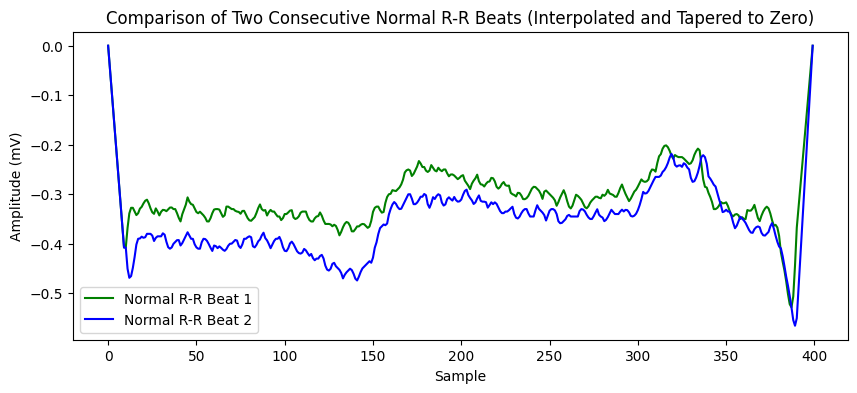

In [28]:


# Load the signal and annotations from the MIT-BIH Arrhythmia Database
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

# Extract the ECG signal (e.g., Lead II, MLII)
ecg_signal = record[0][:, 0]  # Lead MLII

# Extract R-peak annotations and symbols
rpeaks = annotation.sample
symbols = annotation.symbol

# Find indices of normal ('N') beats
normal_indices = np.where(np.array(symbols) == 'N')[0]

# Choose two consecutive normal beats
if len(normal_indices) > 1:
    normal_index_1 = normal_indices[0]
    normal_index_2 = normal_indices[1]

    # Get the R-R intervals for both normal beats
    normal_rr1_start = rpeaks[normal_index_1]
    normal_rr1_end = rpeaks[normal_index_1 + 1]

    normal_rr2_start = rpeaks[normal_index_2]
    normal_rr2_end = rpeaks[normal_index_2 + 1]

    # Extract the two normal R-R beat segments
    normal_rr1 = ecg_signal[normal_rr1_start:normal_rr1_end]
    normal_rr2 = ecg_signal[normal_rr2_start:normal_rr2_end]

    # Choose the number of points to interpolate (e.g., 200 points)
    num_points = 400

    # Interpolate both beats to have the same number of points
    normal_rr1_interp = interp1d(np.linspace(0, 1, len(normal_rr1)), normal_rr1)(np.linspace(0, 1, num_points))
    normal_rr2_interp = interp1d(np.linspace(0, 1, len(normal_rr2)), normal_rr2)(np.linspace(0, 1, num_points))

    # Function to taper the start and end to zero naturally
    def taper_to_zero(signal, taper_len=10):
        # Linearly taper to zero at the start and end
        signal[0:taper_len] = np.linspace(0, signal[taper_len], taper_len)  # Start taper
        signal[-taper_len:] = np.linspace(signal[-taper_len], 0, taper_len)  # End taper
        return signal

    # Taper both beats so they start and end at zero
    normal_rr1_tapered = taper_to_zero(normal_rr1_interp, taper_len=10)
    normal_rr2_tapered = taper_to_zero(normal_rr2_interp, taper_len=10)

    # Plot the results for comparison
    plt.figure(figsize=(10, 4))
    plt.plot(normal_rr1_tapered, label="Normal R-R Beat 1", color='g')
    plt.plot(normal_rr2_tapered, label="Normal R-R Beat 2", color='b')
    plt.legend()
    plt.title("Comparison of Two Consecutive Normal R-R Beats (Interpolated and Tapered to Zero)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude (mV)")
    plt.show()

else:
    print("Not enough normal beats found in this sample.")
